In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas
from scipy import stats
from numpy import matlib
import matplotlib.path as mpath
import matplotlib.ticker as mticker 
import cartopy.crs as ccrs
import cartopy.feature as cf
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import mlab
from scipy import integrate

## Read the zonal mean daily dT/dt and radiative heating rates

### FOCI-HIST

In [2]:
%cd -b sw060
sw060 = xr.open_dataset('FOCI1.7-SW060_T_tendency_1958-2013_zm.nc', decode_times=True)
sw060_sw = xr.open_dataset('FOCI1.7-SW060_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
sw060_lw = xr.open_dataset('FOCI1.7-SW060_echam6_tdiag_1958-2013_dtdt_rheat_lw_pl_zm.nc', decode_times=True)
%cd -b sw061
sw061 = xr.open_dataset('FOCI1.7-SW061_T_tendency_1958-2013_zm.nc', decode_times=True)
sw061_sw = xr.open_dataset('FOCI1.7-SW061_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
sw061_lw = xr.open_dataset('FOCI1.7-SW061_echam6_tdiag_1958-2013_dtdt_rheat_lw_pl_zm.nc', decode_times=True)
%cd -b jh019
jh019 = xr.open_dataset('FOCI1.9-JH019_T_tendency_1958-2013_zm.nc', decode_times=True)
jh019_sw = xr.open_dataset('FOCI1.9.4-JH019_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
jh019_lw = xr.open_dataset('FOCI1.9.4-JH019_echam6_tdiag_1958-2013_dtdt_rheat_lw_pl_zm.nc', decode_times=True)

(bookmark:sw060) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


### FOCI-MOZ

In [3]:
%cd -b sw054
sw054 = xr.open_dataset('FOCI1.4-SW054_T_tendency_1958-2013_zm.nc', decode_times=True)
sw054_sw = xr.open_dataset('FOCI1.4-SW054_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
sw054_lw = xr.open_dataset('FOCI1.4-SW054_echam6_tdiag_1958-2013_dtdt_rheat_lw_pl_zm.nc', decode_times=True)
%cd -b sw064
sw064 = xr.open_dataset('FOCI1.4-SW064_T_tendency_1958-2013_zm.nc', decode_times=True)
sw064_sw = xr.open_dataset('FOCI1.4-SW064_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
sw064_lw = xr.open_dataset('FOCI1.4-SW064_echam6_tdiag_1958-2013_dtdt_rheat_lw_pl_zm.nc', decode_times=True)
%cd -b sw065
sw065 = xr.open_dataset('FOCI1.4-SW065_T_tendency_1958-2013_zm.nc', decode_times=True)
sw065_sw = xr.open_dataset('FOCI1.4-SW065_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
sw065_lw = xr.open_dataset('FOCI1.4-SW065_echam6_tdiag_1958-2013_dtdt_rheat_lw_pl_zm.nc', decode_times=True)

(bookmark:sw054) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


In [4]:
# Make sure the lat coordinate is the same for all
sw060 = sw060.assign_coords(lat=sw054_lw.lat)
sw061 = sw061.assign_coords(lat=sw054_lw.lat)
jh019 = jh019.assign_coords(lat=sw054_lw.lat)
sw054 = sw054.assign_coords(lat=sw054_lw.lat)
sw064 = sw064.assign_coords(lat=sw054_lw.lat)
sw065 = sw065.assign_coords(lat=sw054_lw.lat)

## Compute the radiative heating rates

In [5]:
sw060_rad = sw060_lw.dtdt_rheat_lw + sw060_sw.dtdt_rheat_sw
sw061_rad = sw061_lw.dtdt_rheat_lw + sw061_sw.dtdt_rheat_sw
jh019_rad = jh019_lw.dtdt_rheat_lw + jh019_sw.dtdt_rheat_sw
sw065_rad = sw065_lw.dtdt_rheat_lw + sw065_sw.dtdt_rheat_sw
sw064_rad = sw064_lw.dtdt_rheat_lw + sw064_sw.dtdt_rheat_sw
sw054_rad = sw054_lw.dtdt_rheat_lw + sw054_sw.dtdt_rheat_sw

## Compute the dynamical heating rates

In [6]:
sw060_dyn = sw060.dTdt - sw060_rad
sw061_dyn = sw061.dTdt - sw061_rad
jh019_dyn = jh019.dTdt - jh019_rad
sw065_dyn = sw065.dTdt - sw065_rad
sw064_dyn = sw064.dTdt - sw064_rad
sw054_dyn = sw054.dTdt - sw054_rad

## Compute trends and their significance for each month and plot lat vs plev

In [7]:
def mann_kendall(data):
    
    time = data.year
    month = np.arange(1,13)
    plev = data.plev
    lat = data.lat
    trend = xr.DataArray(np.zeros((len(month), len(plev), len(lat))), dims=['month', 'plev', 'lat'], coords = [month, plev, lat])
    
    for i in range(0, len(time)-1):
        val = data.sel(year=time[i]) # select each value in the array
        sign = xr.where(data>val, 1, 2) # put 1 where following values are greater than val
        sign = xr.where(data<val, -1, sign) # put -1 where following values are smaller than val
        sign = xr.where(data==val, 0, sign) # put 0 where following values are equal to val
        trend = trend + sign[:,i+1::,:,:].sum(dim='year')
        no_equal = sign.where(sign==0).count(dim='year')-1
        
    # Compute the variance
    var = 1/18*(len(time)*(len(time)-1)*(2*len(time)+5))
    
    # Compute the normalized test statistic
    z = xr.where(trend>0, (trend-1)/np.sqrt(var), 0)
    z = xr.where(trend<0, (trend+1)/np.sqrt(var), z)
    
    # Compute the probability associated with the test statistic
    p = 1/np.sqrt(2*np.pi)*np.exp(z**2/(-2))
    
    # Form array with 1 where the trend is significant and 0 elsewhere
    signif = xr.where(p<0.05, 1, 0)
    
    return signif

In [9]:
def ii_mon_trend_lat_plev(data):
    
    data = data.sel(time=slice('1958-01-01', '2002-12-31'))
    
    # Select months 
    from ii_pyfunctions import ii_sel_months
    mon = ii_sel_months(data)  
    
    # Compute the linear trend using least squares method
    def calc_trend(mon):
        time = mon.year
        t = np.arange(1,len(time)+1)
        trend = np.zeros((len(mon.month), len(mon.plev), len(mon.lat)))
        for i in range(0, len(mon.plev)):
            for j in range(0, len(mon.lat)):
                for k in range(0, len(mon.month)):
                    trend[k,i,j], _, _, _, _ = stats.linregress(t, mon[k,:,i,j].values) # linear regression of x from time
            
        trend = xr.DataArray(trend*10, dims=['month', 'plev', 'lat'], coords=[np.arange(1,13), mon.plev, mon.lat])
        
        return trend

    trend_mon = calc_trend(mon)
    
    # Check the significance using the Mann-Kendall test
    sig_mon = mann_kendall(mon) #1 where the trend is significant and 0 elsewhere
    
    signif_mon = xr.where(sig_mon==1, trend_mon, np.nan)
    
    # Compute means for each month
    mean_mon = mon.mean(dim='year')
    
    return trend_mon, signif_mon, mean_mon

In [10]:
def ens_seas_trend(data1, data2, data3):
    
    # Compute the ensemble mean
    ens = xr.concat((data1, data2, data3), dim='exp').mean(dim='exp')
    
    # Compute the ensemble mean trend and its significance
    trend_mon, signif_mon, mean_mon = ii_mon_trend_lat_plev(ens)
    
    return trend_mon, signif_mon, mean_mon

In [11]:
hist_trend_dyn, hist_signif_dyn, hist_mean_dyn = ens_seas_trend(sw060_dyn.squeeze(), sw061_dyn.squeeze(), jh019_dyn.squeeze())

/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python

<xarray.DataArray (month: 12, year: 45, plev: 26, lat: 96)>
array([[[[ 1.06936519,  0.98417622,  1.43659738, ...,         nan,
                  nan,         nan],
         [ 1.51643419,  1.42967931,  1.43323576, ...,  0.76362762,
                  nan,         nan],
         [ 1.46691636,  1.44053646,  1.47028425, ...,  0.49445866,
                  nan,         nan],
         ...,
         [13.96046575, 13.82808265, 13.64056699, ..., -3.36431948,
          -3.41514617, -3.44140989],
         [14.71239313, 14.61531082, 14.43570863, ..., -4.27673478,
          -4.32714406, -4.35735258],
         [13.07752913, 12.94868746, 12.81120382, ..., -5.04383438,
          -5.05199854, -5.05698122]],

        [[ 1.19416698,  1.0657718 ,  1.23256272, ...,         nan,
                  nan,         nan],
         [ 1.95851082,  1.81308321,  1.70450668, ...,  0.71869321,
                  nan,         nan],
         [ 1.57433261,  1.52023886,  1.44129915, ...,  0.56640251,
                  nan,   

/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
moz_trend_dyn, moz_signif_dyn, moz_mean_dyn = ens_seas_trend(sw054_dyn.squeeze(), sw064_dyn.squeeze(), sw065_dyn.squeeze())

/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python

<xarray.DataArray (month: 12, year: 45, plev: 26, lat: 96)>
array([[[[ 1.60965584e+00,  1.43919028e+00,  1.70504798e+00, ...,
                      nan,             nan,             nan],
         [ 1.66945186e+00,  1.60749369e+00,  1.58664404e+00, ...,
           2.60893288e-01,             nan,             nan],
         [ 1.73846485e+00,  1.60354081e+00,  1.59569869e+00, ...,
           6.24140693e-01,             nan,             nan],
         ...,
         [ 1.19872774e+01,  1.19267338e+01,  1.18438205e+01, ...,
          -3.00713169e+00, -3.04291933e+00, -3.07475947e+00],
         [ 1.31972671e+01,  1.31588317e+01,  1.30031089e+01, ...,
          -3.81914152e+00, -3.76200246e+00, -3.73065917e+00],
         [ 1.27307551e+01,  1.27473579e+01,  1.26204109e+01, ...,
          -4.96174064e+00, -4.94829589e+00, -4.92705659e+00]],

        [[ 8.71419456e-01,  1.13990180e+00,  1.29160867e+00, ...,
                      nan,             nan,             nan],
         [ 1.96354326e+00,  

/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [14]:
def lat_pres(trend, sign, mean, cont, cont2, title, xlab, ylab):
   
    con = plt.contourf(trend.lat, trend.plev/100, trend, cont, cmap='RdBu_r', extend='both', hatches=['.'])
    con = plt.contourf(sign.lat, sign.plev/100, sign, cont, cmap='RdBu_r', extend='both')
    cs = plt.contour(mean.lat, mean.plev/100, mean, cont2, colors='k')
    plt.clabel(cs, fmt= '%3.0f', fontsize=18, inline=1)
    plt.xlim(mean.lat.min(), 0)
    plt.ylim(1, 200)
    ax=plt.gca()
    ax.invert_yaxis()
    ax.set_yscale('log')
    plt.xticks([-80, -60, -40, -20,0])
    plt.yticks([1, 2, 5, 10, 20, 50, 100, 200],
               ('1', '2', '5', '10', '20', '50', '100', '200'))
    ax.tick_params(axis='both', labelsize=28)
    ax.minorticks_on()
    plt.xlabel(xlab, fontsize=28)
    plt.ylabel(ylab, fontsize=28) 
    plt.title(title, fontsize=28)
    
    return con

In [15]:
def lat_pres2(trend, sign, mean, cont, cont2, title, xlab, ylab):
   
    con = plt.contourf(trend.lat, trend.plev/100, trend, cont, cmap='RdBu_r', extend='both', hatches=['.'])
    con = plt.contourf(sign.lat, sign.plev/100, sign, cont, cmap='RdBu_r', extend='both')
    cs = plt.contour(mean.lat, mean.plev/100, mean, cont2, colors='k')
    plt.clabel(cs, fmt= '%3.0f', fontsize=22, inline=1)
    plt.xlim(mean.lat.min(), 0)
    plt.ylim(1, 200)
    ax=plt.gca()
    ax.invert_yaxis()
    ax.set_yscale('log')
    plt.xticks([-80, -60, -40, -20,0])
    plt.yticks([1, 2, 5, 10, 20, 50, 100, 200],
               ('1', '2', '5', '10', '20', '50', '100', '200'))
    ax.tick_params(axis='both', labelsize=28)
    ax.minorticks_on()
    plt.xlabel(xlab, fontsize=28)
    plt.ylabel(ylab, fontsize=28) 
    plt.title(title, fontsize=28)
    
    return con

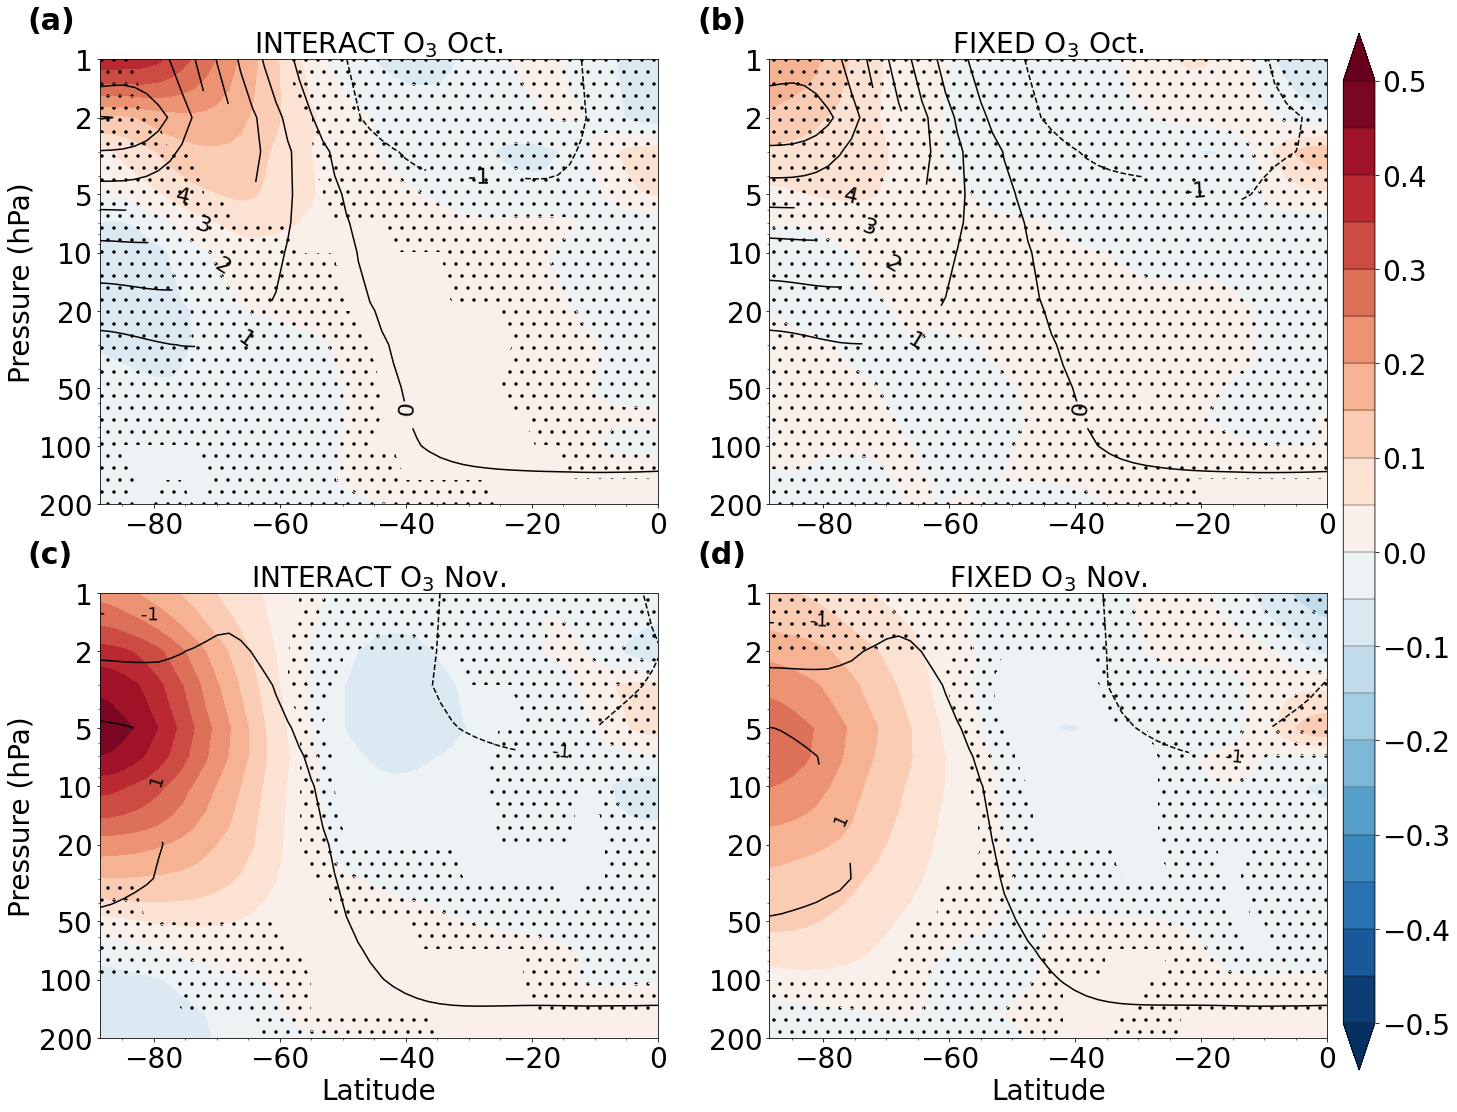

In [17]:
fig = plt.figure(figsize=(22,18))
gs = fig.add_gridspec(2, 2)

# October Q_dyn
cont = np.arange(-0.5,0.51,0.05)
cont2 = np.arange(-15,15.1,1)

ax1 = plt.subplot2grid((2,2), (0,0), colspan=1, rowspan=1)
con = lat_pres2(moz_trend_dyn[9,:,:].squeeze().sel(plev=slice(20000,100)), moz_signif_dyn[9,:,:].squeeze().sel(plev=slice(20000,100)), \
               moz_mean_dyn[9,:,:].squeeze().sel(plev=slice(20000,100)), cont, cont2, 'INTERACT O$_3$ Oct.', '', 'Pressure (hPa)')
plt.text(-100, 0.7, '(a)', fontsize=30, fontweight='bold')

ax2 = plt.subplot2grid((2,2), (0,1), colspan=1, rowspan=1)
con = lat_pres2(hist_trend_dyn[9,:,:].squeeze().sel(plev=slice(20000,100)), hist_signif_dyn[9,:,:].squeeze().sel(plev=slice(20000,100)), \
               hist_mean_dyn[9,:,:].squeeze().sel(plev=slice(20000,100)), cont, cont2, 'FIXED O$_3$ Oct.', '', '')
plt.text(-100, 0.7, '(b)', fontsize=30, fontweight='bold')

# November Q_dyn
cont = np.arange(-0.5,0.51,0.05)
cont2 = np.arange(-15,15.1,1)

ax3 = plt.subplot2grid((2,2), (1,0), colspan=1, rowspan=1)
con = lat_pres(moz_trend_dyn[10,:,:].squeeze().sel(plev=slice(20000,100)), moz_signif_dyn[10,:,:].squeeze().sel(plev=slice(20000,100)), \
               moz_mean_dyn[10,:,:].squeeze().sel(plev=slice(20000,100)), cont, cont2, 'INTERACT O$_3$ Nov.', 'Latitude', 'Pressure (hPa)')
plt.text(-100, 0.7, '(c)', fontsize=30, fontweight='bold')

ax4 = plt.subplot2grid((2,2), (1,1), colspan=1, rowspan=1)
con = lat_pres(hist_trend_dyn[10,:,:].squeeze().sel(plev=slice(20000,100)), hist_signif_dyn[10,:,:].squeeze().sel(plev=slice(20000,100)), \
               hist_mean_dyn[10,:,:].squeeze().sel(plev=slice(20000,100)), cont, cont2, 'FIXED O$_3$ Nov.', 'Latitude', '')
plt.text(-100, 0.7, '(d)', fontsize=30, fontweight='bold')

cax = plt.axes([0.91, 0.1, 0.02, 0.8])
ticks = np.arange(-0.5,0.51,0.1)
c = plt.colorbar(con, ticks=ticks, cax=cax, drawedges=True)
c.ax.tick_params(labelsize=28)